# 1. Practice on Decision Tree Technique For Classification:

In [511]:
# Importing Packages & Libraries:
import pandas as pd
import numpy as np
%matplotlib inline 

bankdata = pd.read_csv("bill_authentication.csv")
print(bankdata.shape,'\n')
print(bankdata.head(2))

(1372, 5) 

   Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0


In [512]:
# Spliting the dataset for Testing & Training:
X = bankdata.drop(['Class'], axis=1)
y = bankdata['Class']

In [513]:
X.head(2)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [514]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

In [515]:
bankdata.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [516]:
bankdata.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [517]:
# Training the Data:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [518]:
X_train.head(2)

,Variance,Skewness,Curtosis,Entropy
681,2.2429,-4.1427,5.23330,-0.401730
709,3.2692,3.4184,0.20706,-0.066824


In [519]:
y_train.head(2)

681    0
709    0
Name: Class, dtype: int64

In [520]:
# Decision Tree Implementation:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [521]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [522]:
y_pred=clf.predict(X_test)

In [523]:
# Importing Metrics:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [524]:
confusion_matrix(y_test,y_pred)

array([[146,   2],
       [  5, 122]], dtype=int64)

In [525]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.98      0.96      0.97       127

    accuracy                           0.97       275
   macro avg       0.98      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [526]:
accuracy_score(y_test,y_pred)*100

97.45454545454545

In [527]:
# Fetching the metrics from analyising the dataset with increasing test size:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
i=1
x=0
for i in range(1,10):
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.15+x)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print('Iternation', i, ':\n')
    print('Confusion Matrix for', i, 'Iteration is:\n', confusion_matrix(y_test,y_pred))
    print('Classification Report for', i, 'Iteration is:\n', classification_report(y_test,y_pred))
    print('Accuracy Score for', i, 'Iteration is:\n', accuracy_score(y_test,y_pred)*100)
    x=x+0.05

Iternation 1 :

Confusion Matrix for 1 Iteration is:
 [[108   0]
 [  3  95]]
Classification Report for 1 Iteration is:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.97      0.98        98

    accuracy                           0.99       206
   macro avg       0.99      0.98      0.99       206
weighted avg       0.99      0.99      0.99       206

Accuracy Score for 1 Iteration is:
 98.54368932038835
Iternation 2 :

Confusion Matrix for 2 Iteration is:
 [[157   1]
 [  2 115]]
Classification Report for 2 Iteration is:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.99      0.98      0.99       117

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy Score for 2 Iteration is:
 98.9090909090909

# 2. Decision Tree Technique For Regression:

In [528]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [529]:
#  Import new Dataset:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [530]:
# Describe the dataset following with regular EDA checks & rectification as required:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [531]:
dataset.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [532]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [533]:
dataset.shape

(48, 5)

In [534]:
# Spliting the dataset or Training & Testing:
X = dataset.drop(['Petrol_Consumption'], axis=1)
y = dataset['Petrol_Consumption']

In [535]:
X.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572


In [536]:
y.head(2)

0    541
1    524
Name: Petrol_Consumption, dtype: int64

In [537]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [538]:
# Implementing Decision Tree For Regression:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [539]:
y_pred

array([510., 510., 547., 508., 510., 580., 508., 587., 591., 510.])

In [540]:
df= pd.DataFrame({'Actual': y_test, 'Predited': y_pred})
df

,Actual,Predited
8,464,510.0
12,525,510.0
29,534,547.0
31,554,508.0
11,471,510.0
17,714,580.0
30,571,508.0
47,524,587.0
34,487,591.0
9,498,510.0


In [541]:
# Import Regression oriented Metrics and Computing it:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.5
Mean Squared Error: 4300.1
Root Mean Squared Error: 65.57514773143862


**Since the RMSE value(65.57514773143862) is more than 10% of the mean of our Target Variable, thus our model failed in prediction task.**

# Trying with other Algorithm for getting comparitively enhanced performance. Trying on Linear Regression, in this case:

In [542]:
# Checking the dataset:
dataset.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [543]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [544]:
X_train.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
45,9.0,4476,3942,0.571
42,7.0,4300,3635,0.603


In [545]:
y_train.head(2)

45    510
42    632
Name: Petrol_Consumption, dtype: int64

In [546]:
# Since the spliting is already done on the datatset as above thus directly executing our Algorithm of Linear Regression:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

In [547]:
y_pred

array([492.24692513, 570.81463285, 460.3047707 , 569.60811683,
       458.51344443, 588.06204618, 558.98523874, 582.86412115,
       492.33383928, 555.21874214])

In [548]:
df= pd.DataFrame({'Actual': y_test, 'Predited': y_pred})
df

,Actual,Predited
8,464,492.246925
12,525,570.814633
29,534,460.304771
31,554,569.608117
11,471,458.513444
17,714,588.062046
30,571,558.985239
47,524,582.864121
34,487,492.333839
9,498,555.218742


In [549]:
# Import Regression oriented Metrics and Computing it:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.52208773384085
Mean Squared Error: 3149.952531907779
Root Mean Squared Error: 56.12443792064005


**Since the RMSE value(56.12443792064005) is less than 10% of the mean of our Target Variable, thus our model worked well in prediction task.**

In [552]:
# Fetching the metrics from analyising the dataset with increasing test size:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
i=1
x=0
for i in range(1,10):
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.15+x)
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred = lin.predict(X_test)
    print('Iternation', i, ':\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),'\n')
    x=x+0.05

Iternation 1 :

Mean Absolute Error: 70.29246093974302
Mean Squared Error: 12970.068544355008
Root Mean Squared Error: 113.88620875397955 

Iternation 2 :

Mean Absolute Error: 60.69313595362555
Mean Squared Error: 4999.488965124109
Root Mean Squared Error: 70.70706446405556 

Iternation 3 :

Mean Absolute Error: 50.97257310346947
Mean Squared Error: 3913.3155054946205
Root Mean Squared Error: 62.556498507306344 

Iternation 4 :

Mean Absolute Error: 52.08306154132617
Mean Squared Error: 3804.933477844999
Root Mean Squared Error: 61.6841428395094 

Iternation 5 :

Mean Absolute Error: 63.235739209294536
Mean Squared Error: 5477.483949833877
Root Mean Squared Error: 74.01002600887178 

Iternation 6 :

Mean Absolute Error: 49.02136135141205
Mean Squared Error: 2944.9103782092957
Root Mean Squared Error: 54.26702846304831 

Iternation 7 :

Mean Absolute Error: 53.97850269494331
Mean Squared Error: 4214.074381629641
Root Mean Squared Error: 64.91590237861321 

Iternation 8 :

Mean Absolute

# Trying on some Hyperparameter Tuning for Decision Tree Performance Enchancement:

In [553]:
# Loading Iris Dataset for Practice Purpose:
from sklearn.datasets import load_iris

In [554]:
iris=load_iris()

In [555]:
X=iris.data
y=iris.target

In [556]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [557]:
type(X)

numpy.ndarray

In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [562]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [564]:
# Running our Decision Tree Algorithm:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test) 

In [565]:
# Underting Models Performace through Metrics:
from sklearn.metrics import *
print('Confusion Matrix for', i, 'Iteration is:\n', confusion_matrix(y_test,y_pred))
print('Classification Report for', i, 'Iteration is:\n', classification_report(y_test,y_pred))
print('Accuracy Score for', i, 'Iteration is:\n', accuracy_score(y_test,y_pred)*100)

Confusion Matrix for 9 Iteration is:
 [[11  0  0]
 [ 0  8  3]
 [ 0  0  8]]
Classification Report for 9 Iteration is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.73      0.84        11
           2       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30

Accuracy Score for 9 Iteration is:
 90.0


In [566]:
# Plotting the Tree:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

[Text(1373.5384615384614, 2491.5, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(1030.1538461538462, 2038.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(1716.9230769230767, 2038.5, 'X[2] <= 4.75\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(686.7692307692307, 1585.5, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(343.38461538461536, 1132.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(1030.1538461538462, 1132.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(2747.076923076923, 1585.5, 'X[3] <= 1.75\ngini = 0.127\nsamples = 44\nvalue = [0, 3, 41]'),
 Text(1716.9230769230767, 1132.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(1373.5384615384614, 679.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(2060.3076923076924, 679.5, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(1716.9230769230767, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Te

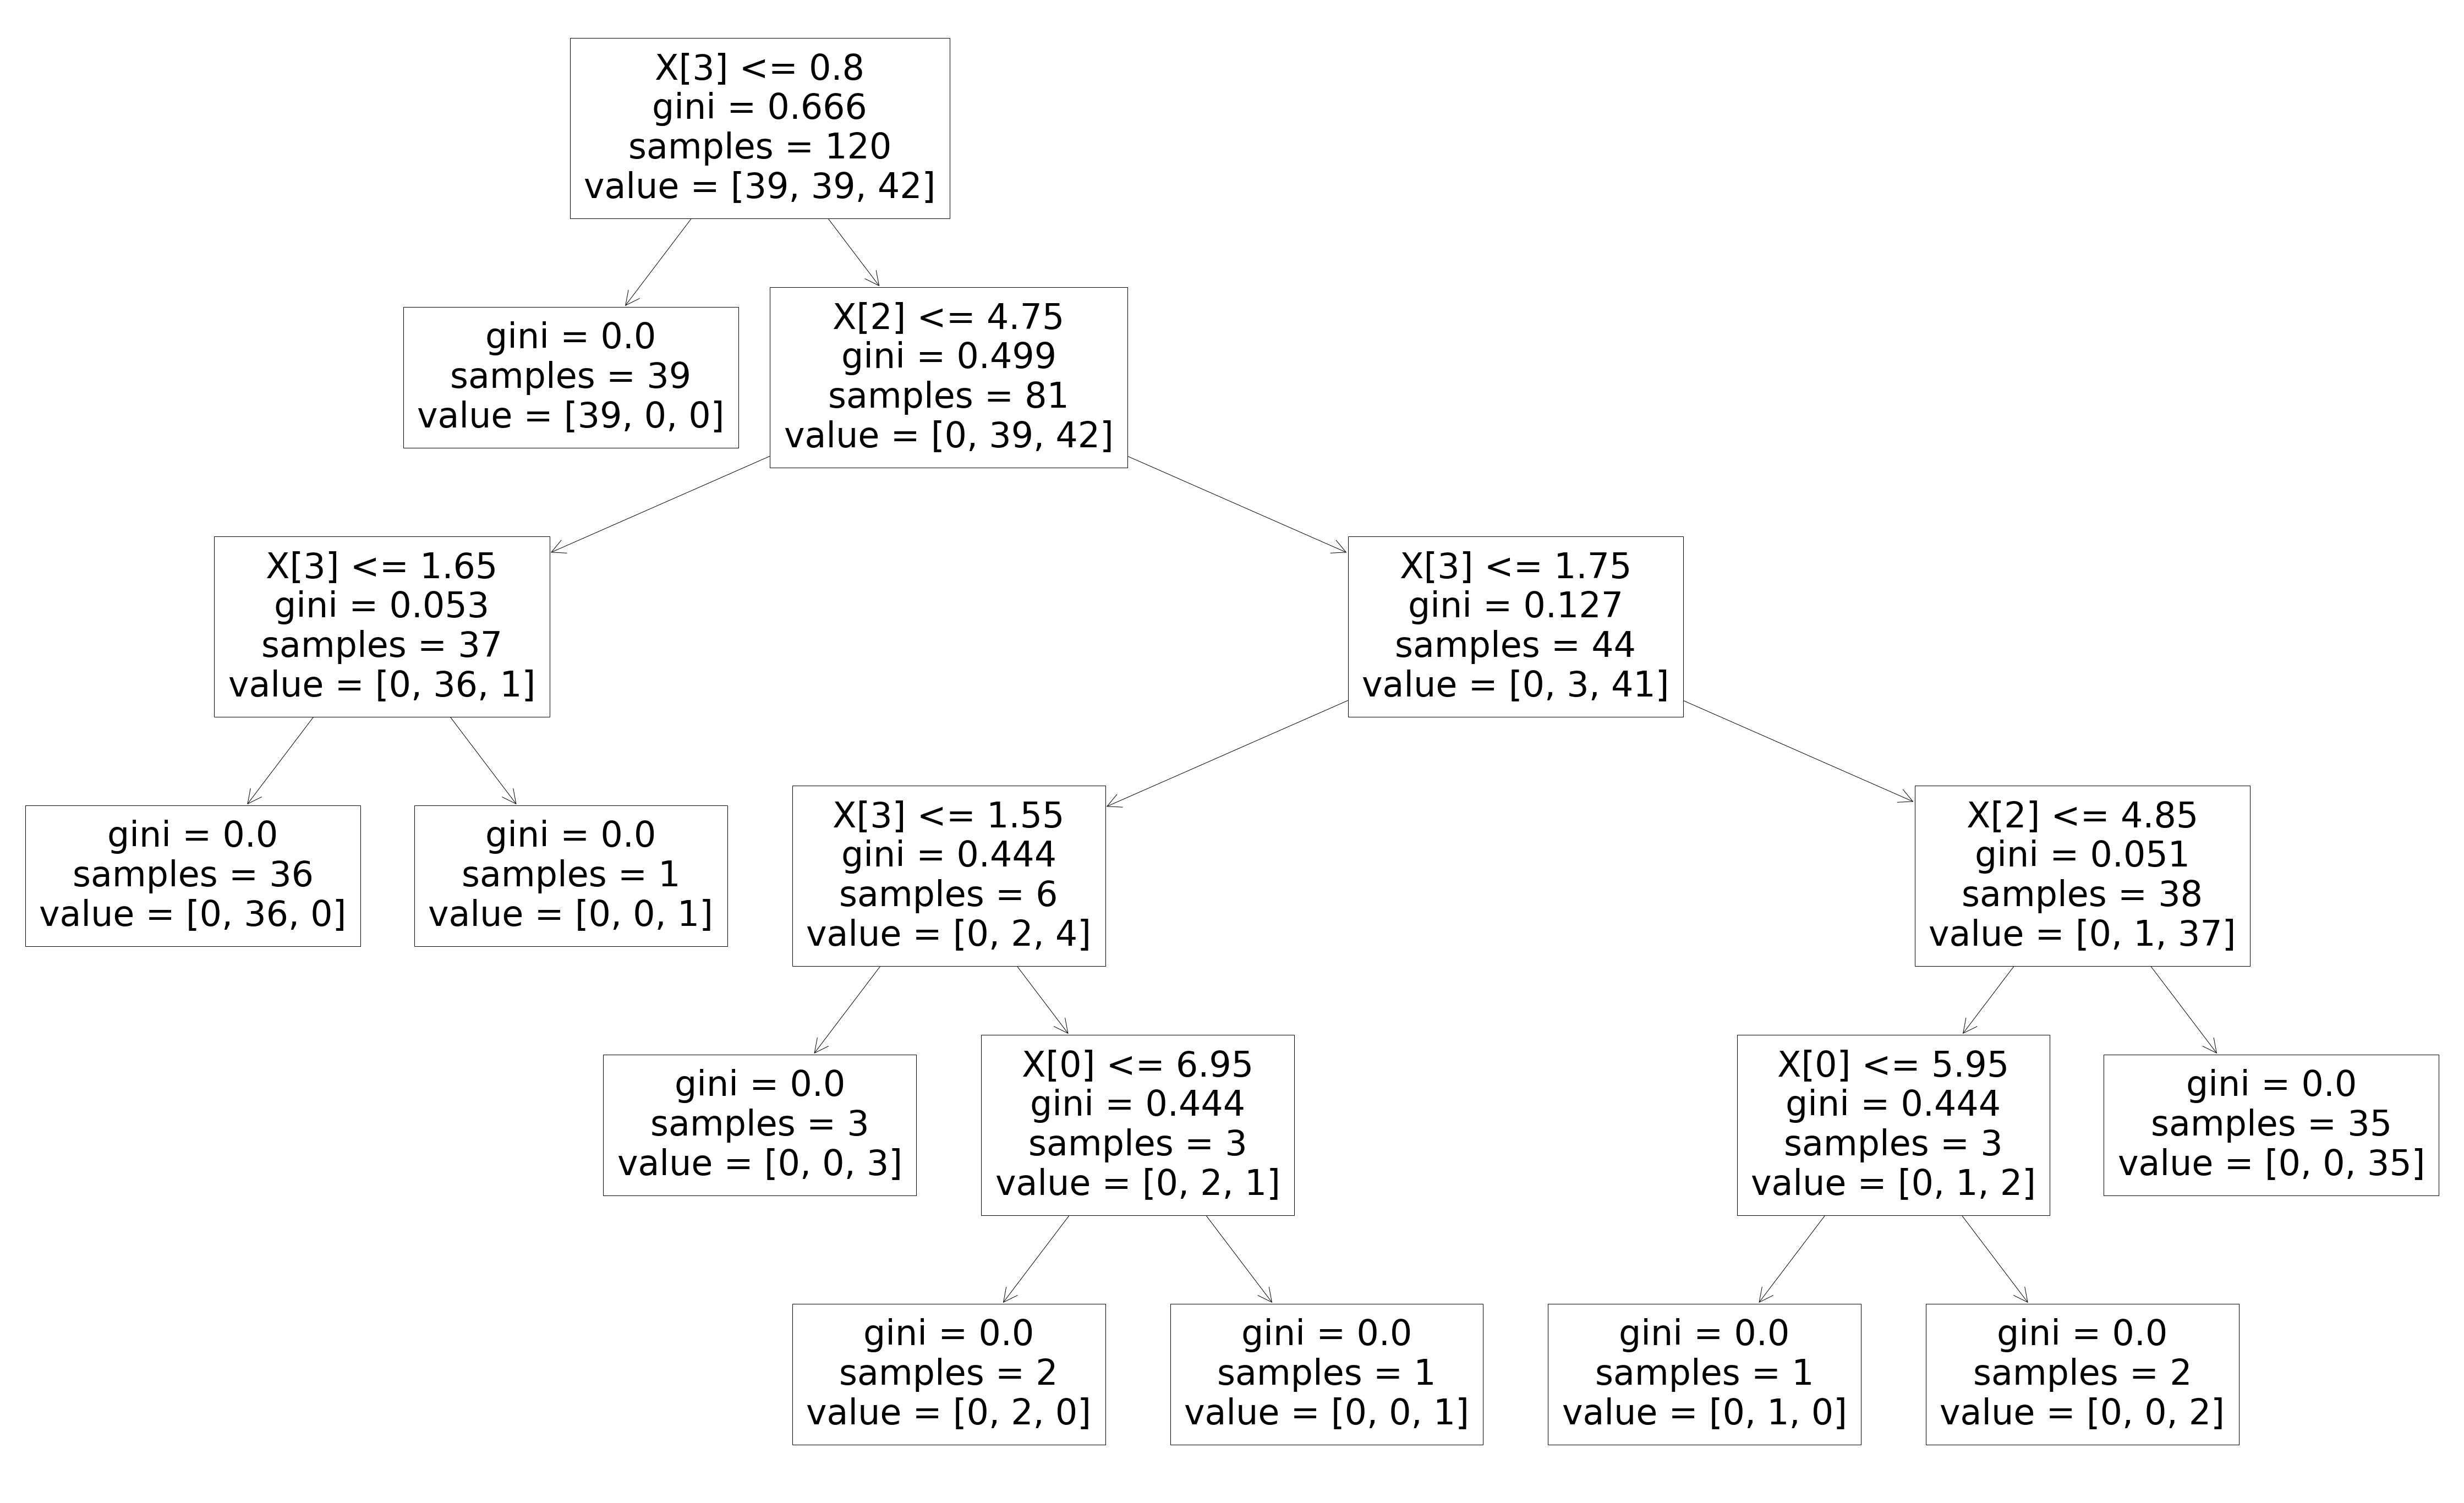

In [568]:
rcParams['figure.figsize'] = 80,50 # 80, 50 are pixel values
plot_tree(dt)

# 3. Working on 'Social_Network_Ads.csv' Dataset for HyperParameter Tuning Using GridSearchCV():

In [569]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [570]:
# Encoding the Gender Column:
data['Gender'].replace({'Male': 0, 'Female':1}, inplace=True)

In [571]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [572]:
X = data.iloc[:,1:4].values
y=data.iloc[:,-1].values

In [573]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [574]:
X=scaler.fit_transform(X)
X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [575]:
# Spliting the data for Training & Testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [576]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [577]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [578]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [580]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100,'%')

Accuracy Score: 82.5 %


In [581]:
#  Creating a list of pamameters in context of HyperParameter Tuning:
param_dist = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,None]
}

In [582]:
# Importing GridSearchCV:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [583]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [585]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [587]:
print('Accuracy of the model with best Estimators used:', grid.best_score_ *100,'%')

Accuracy of the model with best Estimators used: 90.9375 %


In [588]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

# Using RandomizedSearchCV for HyperParameter Tuning on Diabetes Dataset:

In [590]:
data1=pd.read_csv('diabetes_with_names.csv')

In [591]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [598]:
data1.shape

(768, 9)

In [594]:
# Performing Basic EDA's:
data1.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [600]:
data1.dropna(inplace=True)

In [601]:
data1.shape

(764, 9)

In [602]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1
5,5.0,116,74,0.0,0,25.6,0.201,30.0,0
7,10.0,115,0,0.0,0,35.3,0.134,29.0,0


In [607]:
# Spliting the data to perform Training and Testing on it:
X=data1.drop(['Outcome'],axis=1)
y=data1['Outcome']

In [608]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50.0
3,1.0,89,66,23.0,94,28.1,0.167,21.0


In [609]:
y.head()

0    1
3    0
4    1
5    0
7    0
Name: Outcome, dtype: int64

In [610]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [611]:
X = scaler.fit_transform(X)

In [612]:
X

array([[ 6.42403491e-01,  8.49145968e-01,  1.48276393e-01, ...,
         2.00728950e-01,  4.66288151e-01,  1.42113255e+00],
       [-8.43057365e-01, -1.00083488e+00, -1.61381459e-01, ...,
        -4.96347948e-01, -9.20567984e-01, -1.04087486e+00],
       [-1.14014954e+00,  5.04234285e-01, -1.50323215e+00, ...,
         1.40477086e+00,  5.47404476e+00, -2.21131736e-02],
       ...,
       [ 3.45311319e-01,  2.54456501e-03,  1.48276393e-01, ...,
        -7.37156331e-01, -6.85405422e-01, -2.76803595e-01],
       [-8.43057365e-01,  1.59322603e-01, -4.71039311e-01, ...,
        -2.42865440e-01, -3.71855339e-01,  1.16644213e+00],
       [-8.43057365e-01, -8.75412445e-01,  4.50571089e-02, ...,
        -2.04843064e-01, -4.74362097e-01, -8.71081246e-01]])

In [613]:
# Spliting the data for Training & Testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [614]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [616]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [617]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [618]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100,'%')

Accuracy Score: 73.8562091503268 %


In [619]:
#  Creating a list of pamameters in context of HyperParameter Tuning:
param_dist = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,None]
}

In [629]:
# Importing RandomizedSearchCv:
from sklearn.model_selection import RandomizedSearchCV
rd=RandomizedSearchCV(param_distributions=param_dist,estimator=clf, n_jobs=-1)

In [630]:
rd.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [631]:
rd.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [632]:
print('Accuracy of the model with best Estimators used:', rd.best_score_ *100,'%')

Accuracy of the model with best Estimators used: 74.29828068772491 %


In [633]:
rd.best_params_

{'max_depth': 5, 'criterion': 'entropy'}